# <center>AirPassengers Data</center>

In [1]:
# This timeSeries data comes with R

data(AirPassengers)

In [2]:
class(AirPassengers)

[1] "ts"

In [3]:
start(AirPassengers)

[1] 1949    1

In [4]:
end(AirPassengers)

[1] 1960   12

In [5]:
frequency(AirPassengers)

[1] 12

In [6]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [7]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


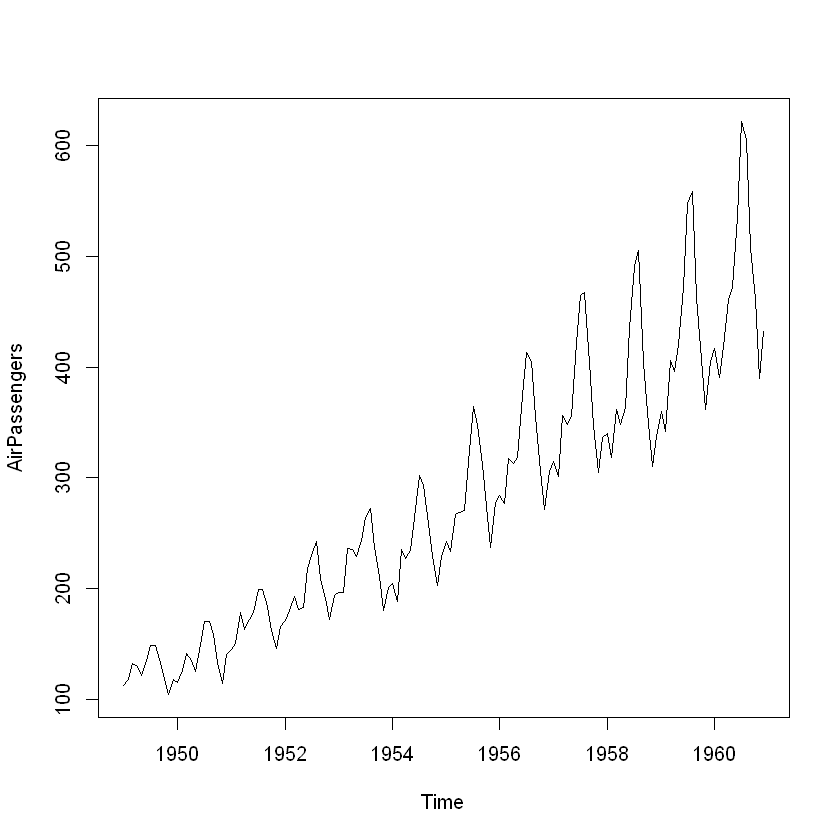

In [8]:
plot(AirPassengers)

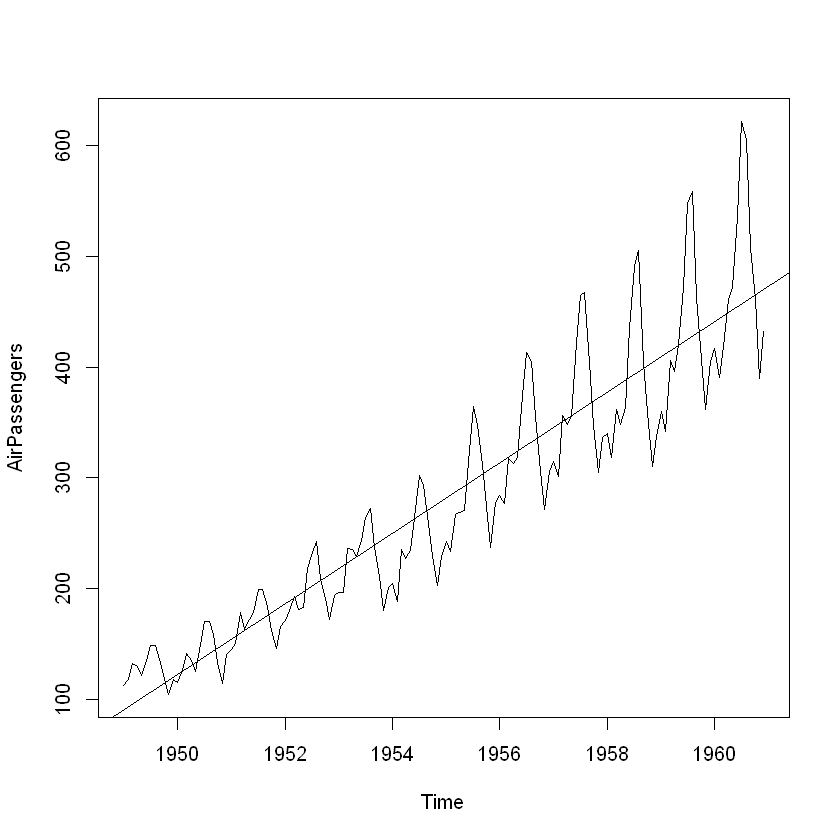

In [9]:
plot(AirPassengers)
abline(reg=lm(AirPassengers~time(AirPassengers)))

### This data is not Stationary because the mean is not constant it changed According to time and variance is also not be the equal  So.. we have to make it Stationary
<br><br>
### Components Of Time Series

* General Trend
* Seasonal  
* Irregular Fluctuations

In [10]:
cycle(AirPassengers)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


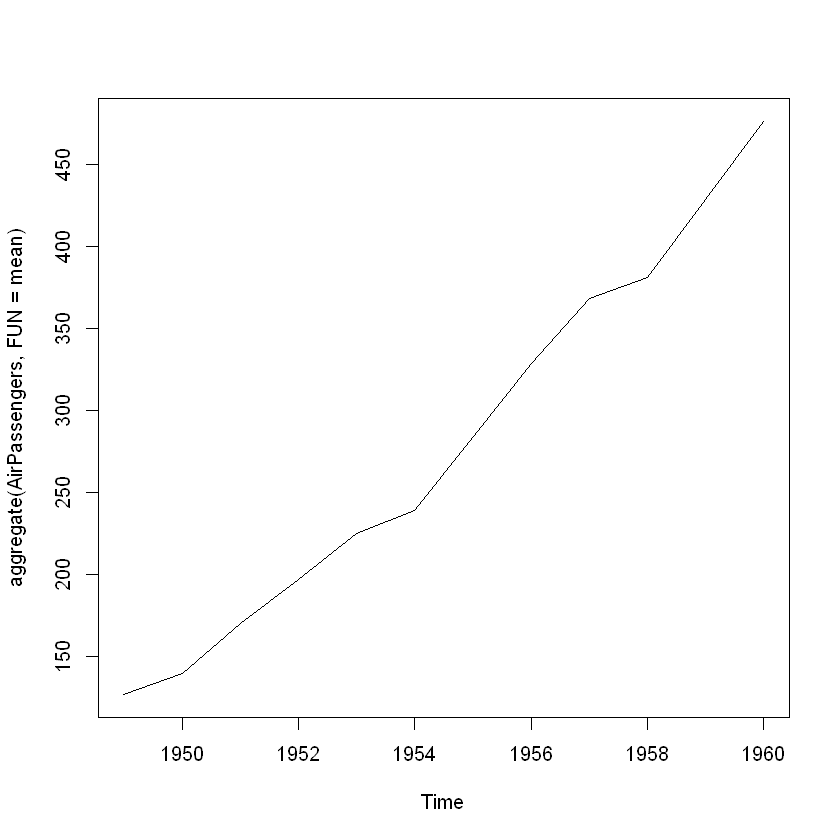

In [11]:
plot(aggregate(AirPassengers,FUN=mean))

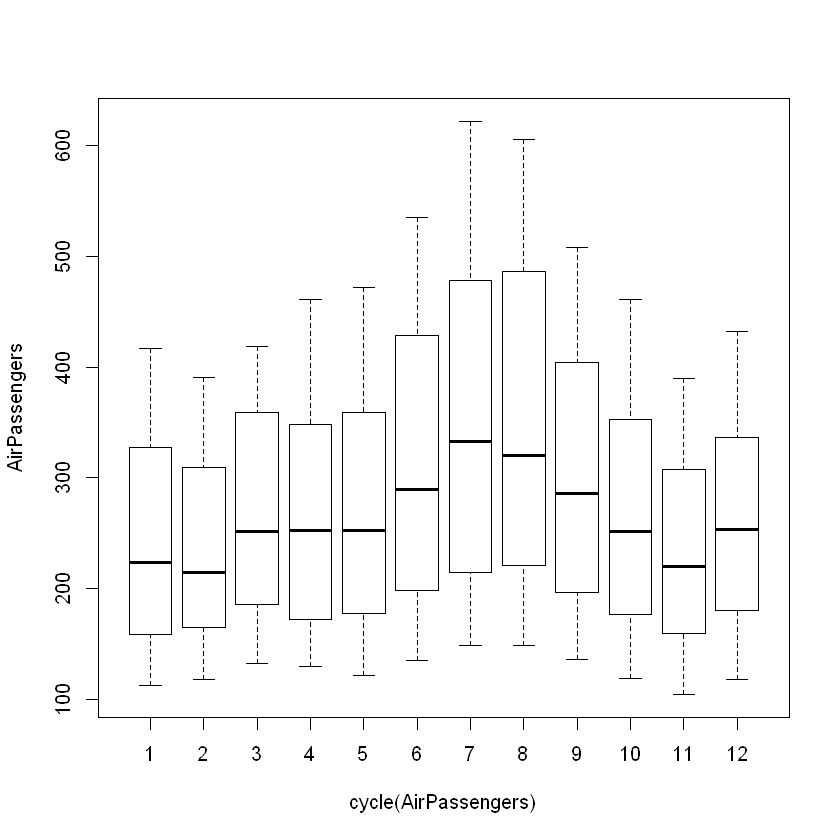

In [12]:
# the Passengers is been increased in 7th and 8th month
boxplot(AirPassengers~cycle(AirPassengers))

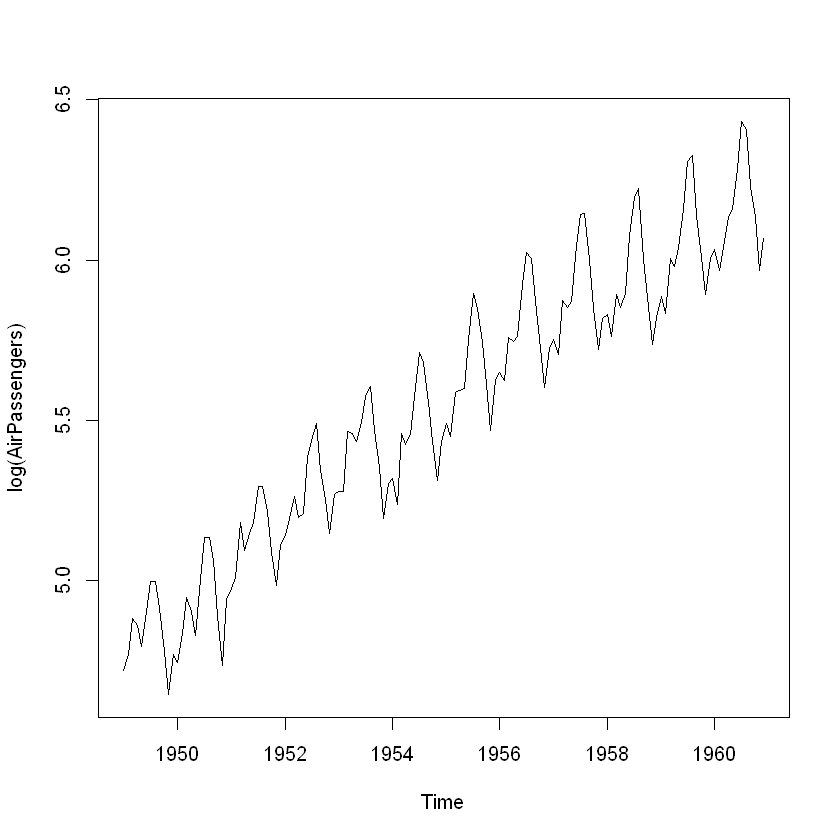

In [13]:
plot(log(AirPassengers))

# now if we pass mean line in this the varience will be equal

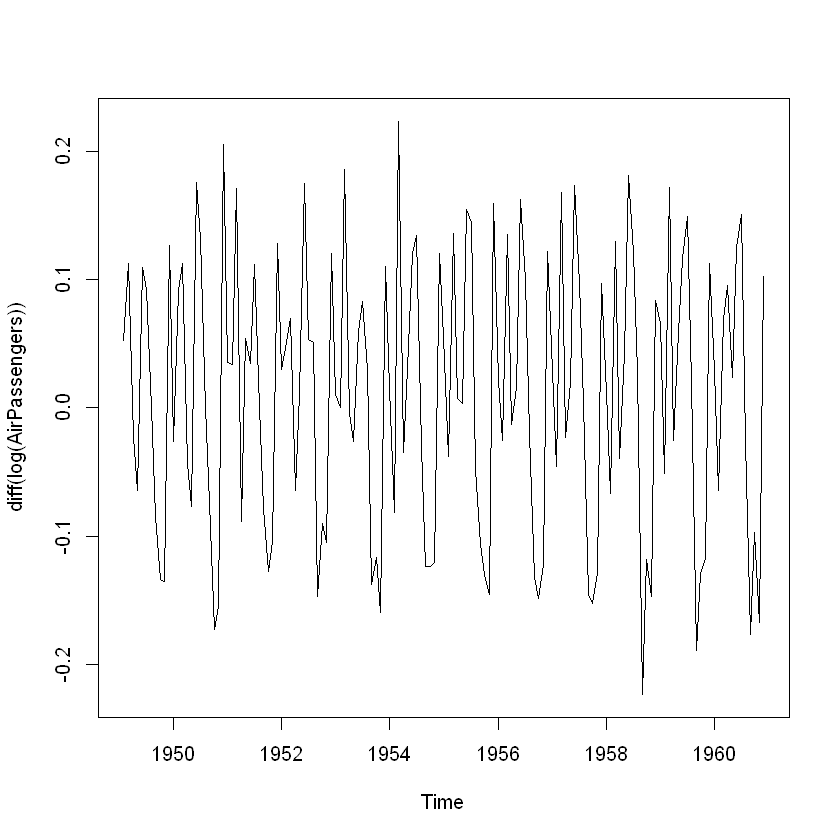

In [14]:
plot(diff(log(AirPassengers)))

# now my data is Stationary because both condition are satisfied

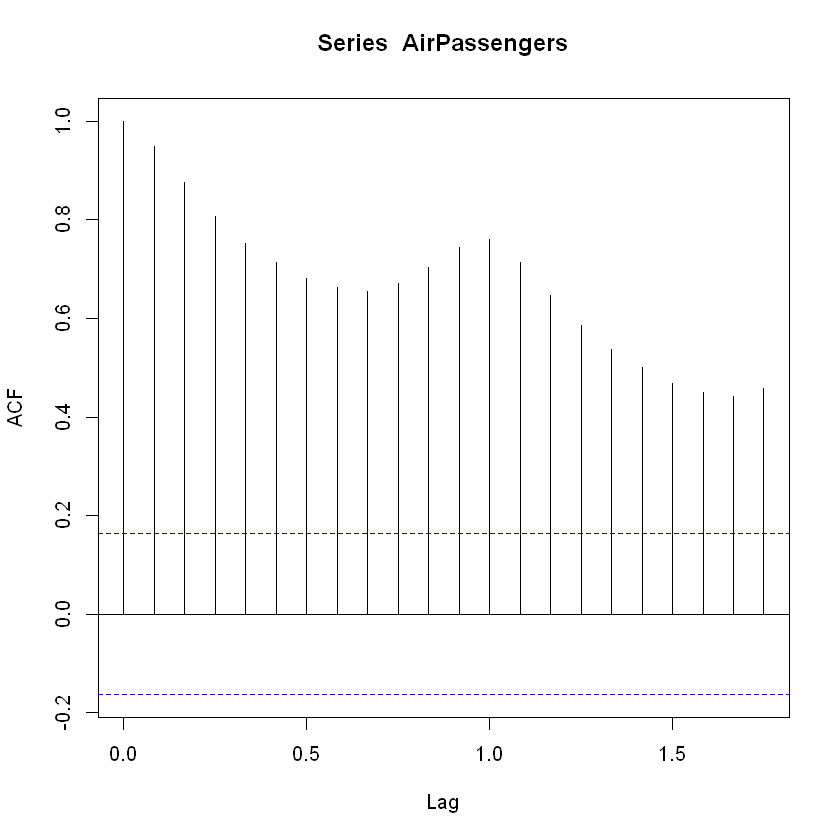

In [15]:
acf(AirPassengers)

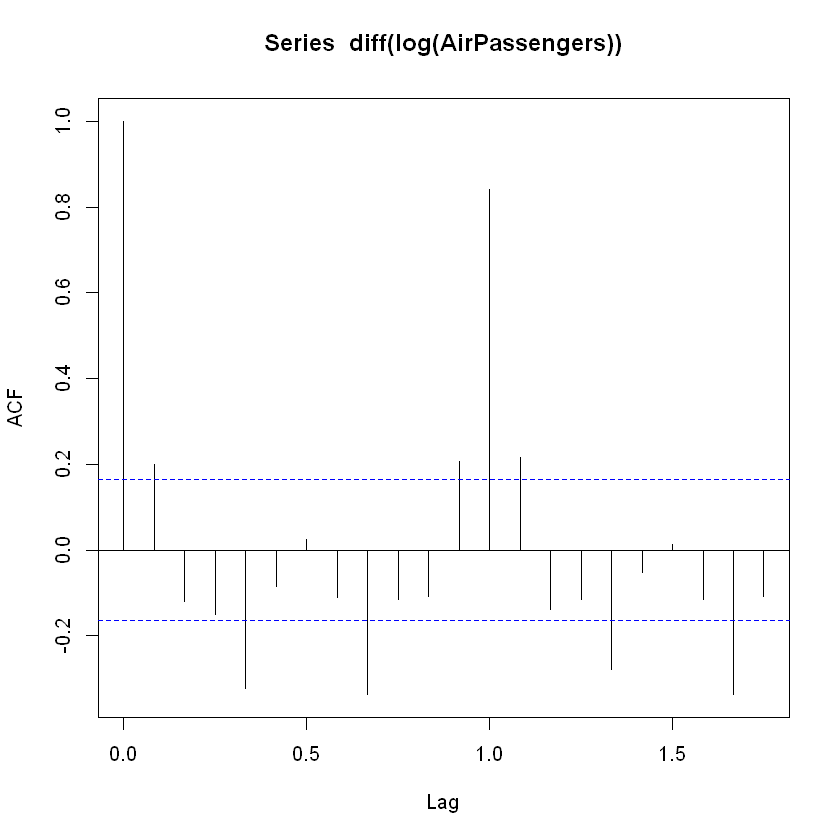

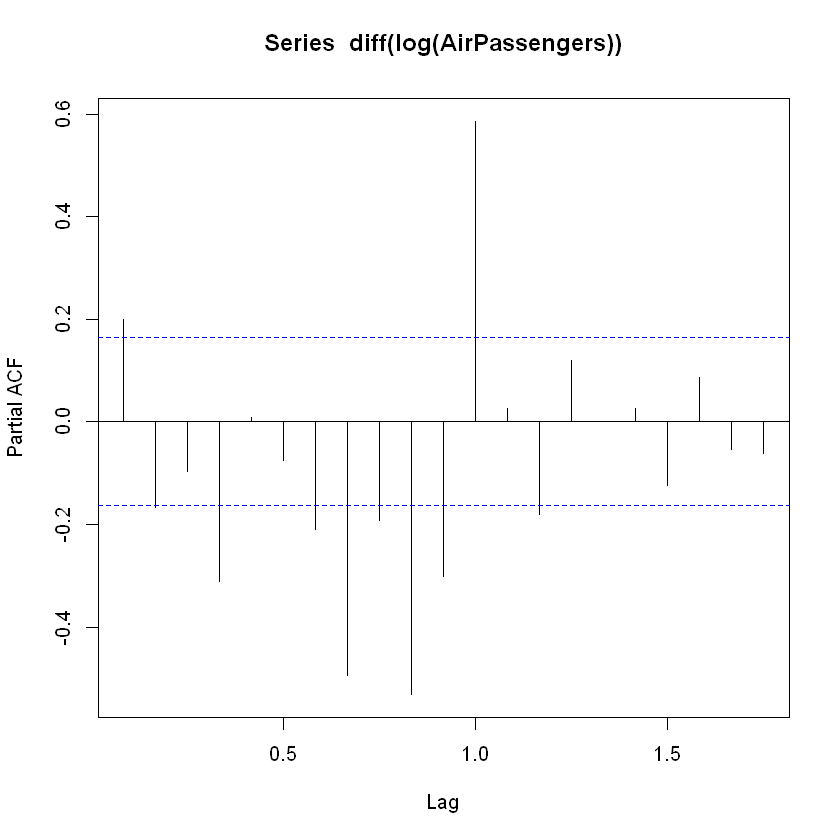

In [16]:
acf(diff(log(AirPassengers)))  # q = 1
pacf(diff(log(AirPassengers))) # p = 0, (d = 1 because we diff the data only once) 

In [17]:
# here i did not add diff before log because we add the value of diff as d = 1

fit <- arima(log(AirPassengers), c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))

In [18]:
pred <- predict(fit, n.ahead = 10*12)  # we are predicting the data for next 10 Year

pred1 <- 2.718^pred$pred  # the value are in log form so we have to change it into decimal form

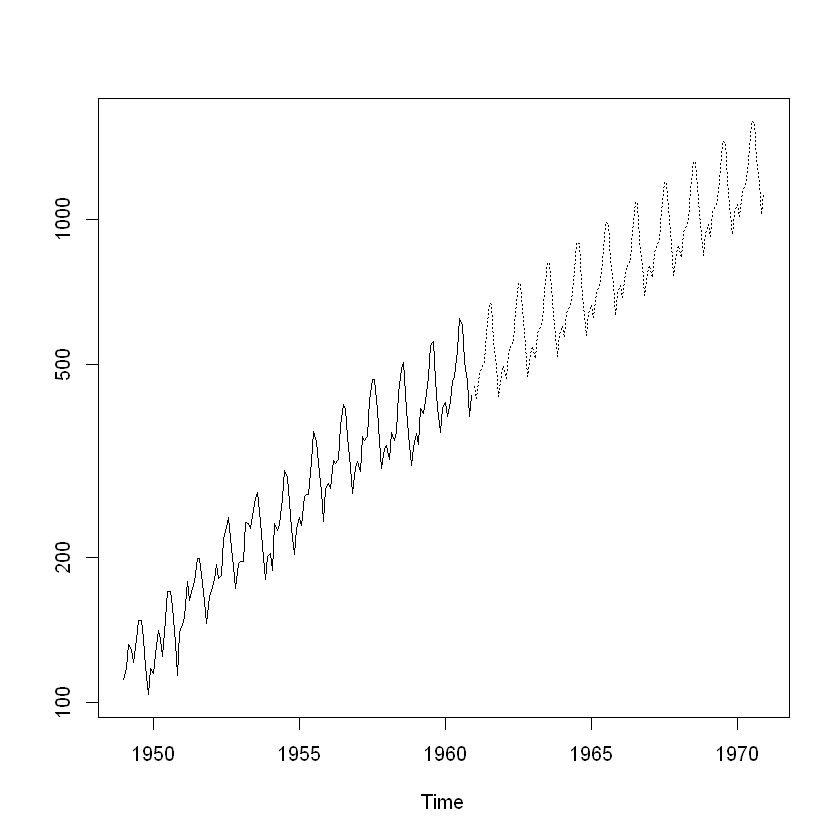

In [19]:
ts.plot(AirPassengers, pred1, log = "y", lty = c(1,3))

In [20]:
# Testing our model

datawide <- ts(AirPassengers, frequency = 12, start = c(1949,1), end = c(1959,12))

In [21]:
fit2 <- arima(log(datawide), c(0,1,1), seasonal = list(order = c(0,1,1), period = 12))

In [22]:
pred <- predict(fit2, n.ahead = 10*12)

In [23]:
pred1 <- 2.718^pred$pred

data1 <- head(pred1,12)

In [24]:
data1

[1] 419.0628 398.6732 466.2820 454.1188 472.9611 546.7614 621.8017 629.7291
 [9] 526.4044 461.9958 406.3747 452.0098

In [25]:
predicted_1960 = round(data1, digits = 0)

original_1960 = tail(AirPassengers, 12)

In [26]:
predicted_1960

[1] 419 399 466 454 473 547 622 630 526 462 406 452

In [27]:
original_1960

[1] 417 391 419 461 472 535 622 606 508 461 390 432

In [28]:
df = data_frame(original_1960, predicted_1960)

ERROR: Error in data_frame(original_1960, predicted_1960): could not find function "data_frame"


function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x0000000032938ea0>
<environment: namespace:stats>